In [3]:
#Imports
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.odr import ODR, Model, Data, RealData


In [14]:
#Measuring Wavelength of HeNe Laser

#Measured data
d_list = [40,46,52,52]  #change in mirror distance [um]
derr = [1,1,1,1]        #uncertainty of micrometer [um]

m_list = [122,139,152,155]  #number of fringes
merr = [0.5,0.5,0.5,0.5]    #uncertainty of fringes


#Function to determine number of fringes
def fringes_curvefit(params, d):
    return (2000*d/params[0])


#Compute ODR curvefit
data = RealData(d_list, m_list, derr, merr)  #measured data for model function
model = Model(fringes_curvefit)              #modeling function for fringes
pguess = [650]                               #guess of best fit wavelength
odr = ODR(data, model, pguess)               #container for odr curvefit
output = odr.run()                           #running odr curvefit
print('The best fit wavelength is', str(round(output.beta[0],2)),'+-',str(round(output.sd_beta[0],2))+'nm.')


The best fit wavelength is 669.79 +- 6.07nm.


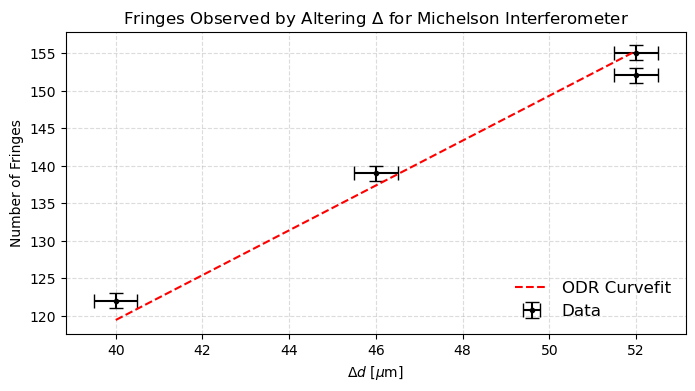

In [16]:
#Plotting the figure
d_range = np.linspace(40,52,100)

plt.figure(figsize=(8,4),dpi=100)
plt.errorbar(d_list, m_list, derr, merr, capsize=5, fmt='k.', label='Data')
plt.plot(d_range, fringes_curvefit(output.beta, d_range), linestyle='dashed', color='red', label='ODR Curvefit')
plt.grid(True, alpha=0.4, linestyle='dashed', color='darkgray')
plt.xlabel('$\Delta d$ [$\mu$m]')
plt.ylabel('Number of Fringes')
plt.title('Fringes Observed by Altering $\Delta$ for Michelson Interferometer')
plt.legend(prop={'size':12}, frameon=False)
plt.rcParams['legend.loc'] = 'lower right'
plt.show()


In [17]:
#Measuring Index of Refraction of Air

#Measured data
pcell_list = [15.03,17.53,20.03,22.53,25.03]  #pressure in gas cell [in/Hg]
perr = [0.5,0.5,0.5,0.5,0.5]                  #uncertainty in pressure [in/Hg]

m2_list = [16,14,11,8,5]       #number of fringes
m2err = [0.5,0.5,0.5,0.5,0.5]  #uncertainty of fringes


#Function to determine number of fringes
wavelength = 632.8  #wavelength of HeNe laser [nm]
P0 = 30.03          #atmospheric pressure on 03/01/2022 [in/Hg]
L = 4.52            #length of gas cell [cm]

def fringes_curvefit2(params, p):
    return ((2*L*10**7)*(params[0]-(1+(params[0]-1)*(p/P0))))/wavelength


#Compute ODR curvefit
data2 = RealData(pcell_list, m2_list, perr, m2err)  #measured data for model function
model2 = Model(fringes_curvefit2)                   #modeling function for fringes
pguess2 = [1.000223]                                #guess of best fit wavelength
odr2 = ODR(data2, model2, pguess2)                  #container for odr curvefit
output2 = odr2.run()                                #running odr curvefit
print('The best fit index of refraction is', str(round(output2.beta[0],6)),'+-',str(round(output2.sd_beta[0],6))+'.')


The best fit index of refraction is 1.000228 +- 3e-06.


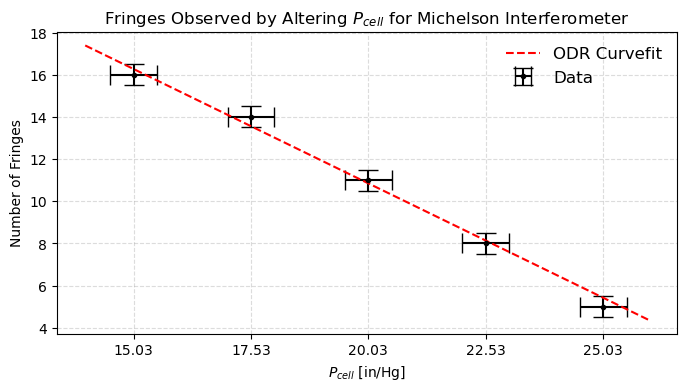

In [19]:
#Plotting the figure
pcell_range = np.linspace(14,26,100)

plt.figure(figsize=(8,4),dpi=100)
plt.errorbar(pcell_list, m2_list, perr, m2err, capsize=7, fmt='k.', label='Data')
plt.plot(pcell_range, fringes_curvefit2(output2.beta, pcell_range), linestyle='dashed', color='red', label='ODR Curvefit')
plt.grid(True, alpha=0.4, linestyle='dashed', color='darkgray')
plt.xticks([15.03,17.53,20.03,22.53,25.03],['15.03','17.53','20.03','22.53','25.03'])
plt.xlabel('$P_{cell}$ [in/Hg]')
plt.ylabel('Number of Fringes')
plt.title('Fringes Observed by Altering $P_{cell}$ for Michelson Interferometer')
plt.legend(prop={'size':12}, frameon=False)
plt.rcParams['legend.loc'] = 'upper right'
plt.show()
